In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list -s "dogs vs cats"

ref                                                    title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
shaunthesheep/microsoft-catsvsdogs-dataset             Cats-vs-Dogs                                       788MB  2020-03-12 05:34:30          58376        618  0.875            
biaiscience/dogs-vs-cats                               Dogs vs Cats                                       817MB  2017-12-05 14:03:33          21661        312  0.4375           
salader/dogs-vs-cats                                   dogs vs cats                                         1GB  2018-11-30 19:31:13         110102        350  0.375            
sujaykapadnis/cats-vs-dogs                             Cats Vs Dogs                                         2K

In [ ]:
!kaggle datasets download -d lucassj/dogs-vs-cats-train-validadion-and-evaluation

Dataset URL: https://www.kaggle.com/datasets/lucassj/dogs-vs-cats-train-validadion-and-evaluation
License(s): unknown
 99% 1.06G/1.07G [00:17<00:00, 31.3MB/s]
100% 1.07G/1.07G [00:17<00:00, 67.2MB/s]


In [ ]:
!unzip dogs-vs-cats-train-validadion-and-evaluation.zip -d cat_dog_data

Streaming output truncated to the last 5000 lines.
  inflating: cat_dog_data/validation/cat/cat.10000.jpg  
  inflating: cat_dog_data/validation/cat/cat.10001.jpg  
  inflating: cat_dog_data/validation/cat/cat.10002.jpg  
  inflating: cat_dog_data/validation/cat/cat.10003.jpg  
  inflating: cat_dog_data/validation/cat/cat.10004.jpg  
  inflating: cat_dog_data/validation/cat/cat.10005.jpg  
  inflating: cat_dog_data/validation/cat/cat.10006.jpg  
  inflating: cat_dog_data/validation/cat/cat.10007.jpg  
  inflating: cat_dog_data/validation/cat/cat.10008.jpg  
  inflating: cat_dog_data/validation/cat/cat.10009.jpg  
  inflating: cat_dog_data/validation/cat/cat.10010.jpg  
  inflating: cat_dog_data/validation/cat/cat.10011.jpg  
  inflating: cat_dog_data/validation/cat/cat.10012.jpg  
  inflating: cat_dog_data/validation/cat/cat.10013.jpg  
  inflating: cat_dog_data/validation/cat/cat.10014.jpg  
  inflating: cat_dog_data/validation/cat/cat.10015.jpg  
  inflating: cat_dog_data/validation/

In [23]:
import tensorflow as tf
train_data_set="/content/cat_dog_data/train"
evl_data_set="/content/cat_dog_data/validation"

In [25]:
image_size=(256,256)

In [26]:
training_data_set=tf.keras.preprocessing.image_dataset_from_directory(
    train_data_set,
    labels='inferred',
    label_mode='int',
    image_size=image_size,
    batch_size=32,
    color_mode='rgb',
    seed=123
)

Found 20000 files belonging to 2 classes.


In [27]:
validation_data_set=tf.keras.preprocessing.image_dataset_from_directory(
    evl_data_set,
    labels='inferred',
    label_mode='int',
    image_size=image_size,
    batch_size=32,
    color_mode='rgb',
    seed=123
)

Found 5000 files belonging to 2 classes.


In [28]:
normalization_layer=tf.keras.layers.Rescaling(1./255)
train_data_set=training_data_set.map(lambda x,y:(normalization_layer(x),y))
valid_data_set=validation_data_set.map(lambda x,y:(normalization_layer(x),y))

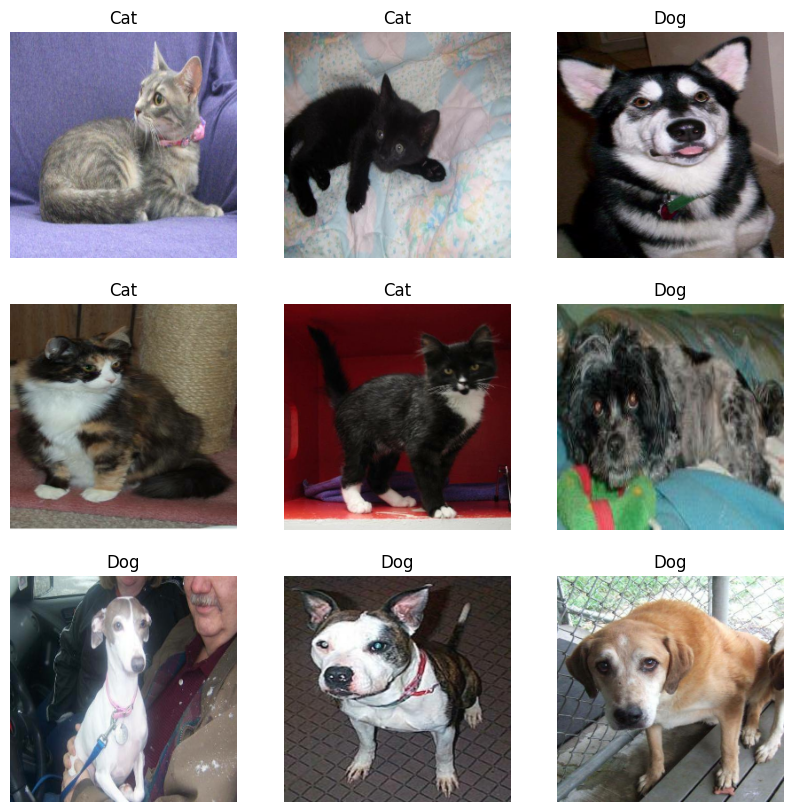

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for images,labels in train_data_set.take(1):
  for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy())
    plt.title("Cat" if labels[i]==0 else "Dog")
    plt.axis("off")
plt.show()

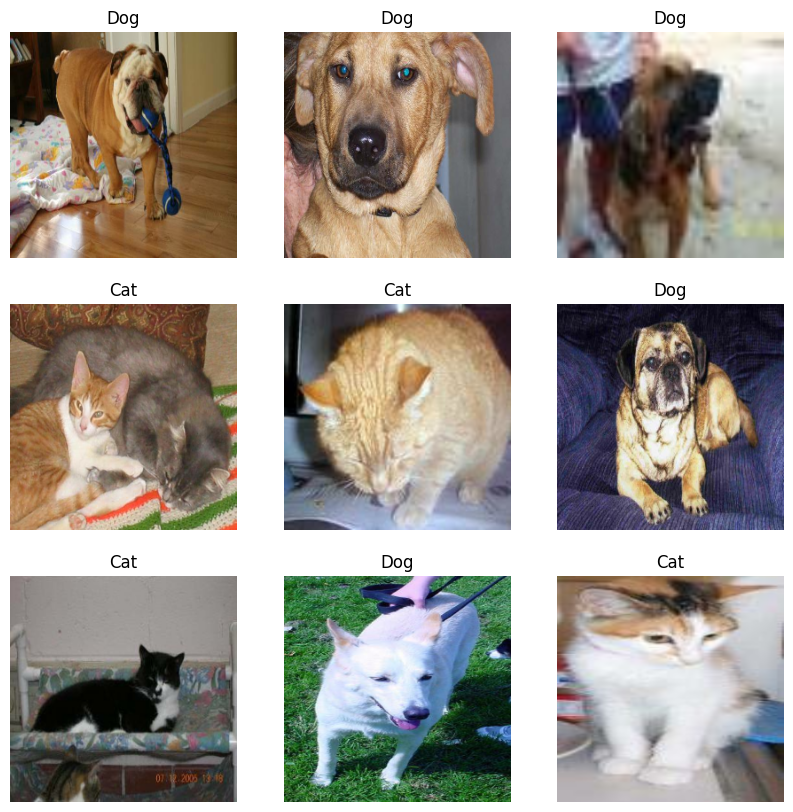

In [30]:
plt.figure(figsize=(10,10))
for images,labels in eval_data_set.take(1):
  for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy())
    plt.title("Cat" if labels[i]==0 else "Dog")
    plt.axis("off")
plt.show()

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,BatchNormalization,Dense,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

In [32]:
model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',padding='valid',input_shape=(256,256,3),kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(256,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 28, 28, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │      12,845,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,276,865 (50.65 MB)

 Trainable params: 13,275,905 (50.64 MB)

 Non-trainable params: 960 (3.75 KB)

In [33]:
model.compile(optimizer=Adam(),loss='binary_crossentropy',metrics=['accuracy'])

In [34]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(monitor='val_accuracy',patience=5,verbose=1,restore_best_weights=True)

In [35]:
history=model.fit(train_data_set,epochs=10,validation_data=valid_data_set,callbacks=[early_stopping])

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 62s 90ms/step - accuracy: 0.6110 - loss: 1.0171 - val_accuracy: 0.5850 - val_loss: 0.9861
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 94ms/step - accuracy: 0.7543 - loss: 0.5346 - val_accuracy: 0.7592 - val_loss: 0.5323
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 89ms/step - accuracy: 0.8307 - loss: 0.4008 - val_accuracy: 0.7682 - val_loss: 0.4846
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 88ms/step - accuracy: 0.8777 - loss: 0.3075 - val_accuracy: 0.8000 - val_loss: 0.4574
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 88ms/step - accuracy: 0.9273 - loss: 0.1913 - val_accuracy: 0.8530 - val_loss: 0.3608
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 88ms/step - accuracy: 0.9588 - loss: 0.1219 - val_accuracy: 0.8294 - val_loss: 0.5053
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 94ms/step - accuracy: 0.9739 - loss: 0.0796 - val_accuracy: 0.8542 - val_loss: 0.6180
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 88ms/step - accuracy: 0.9812 - loss: 0.0600 - 

In [38]:
val_loss,val_accuracy=model.evaluate(valid_data_set)
print(f'Validation Loss:{val_loss}')
print(f'Validation Accuracy:{val_accuracy}')

157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - accuracy: 0.8817 - loss: 0.5853
Validation Loss:0.5882971286773682
Validation Accuracy:0.8791999816894531


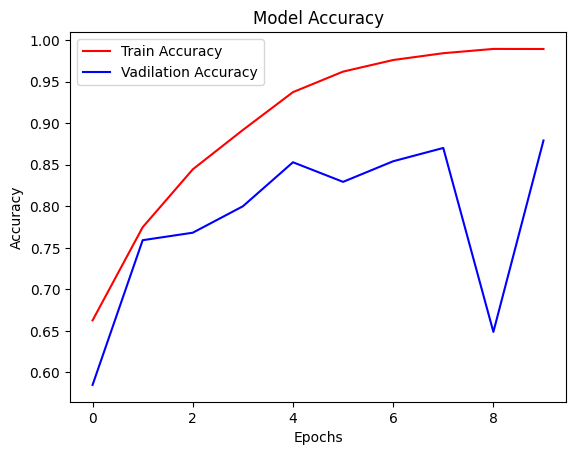

In [39]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='Train Accuracy')
plt.plot(history.history['val_accuracy'],color='blue',label='Vadilation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 941ms/step


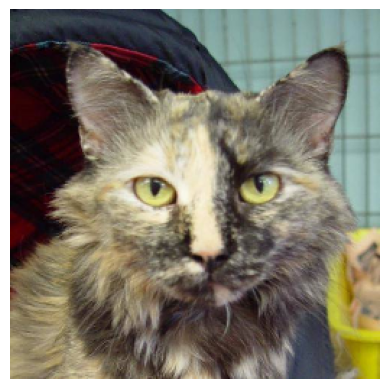

In [40]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
image_path="/content/cat_dog_data/train/cat/cat.10.jpg"
img=image.load_img(image_path,target_size=image_size)
img_array=image.img_to_array(img)
img_array=tf.expand_dims(img_array,0)
prediction=model.predict(img_array)
plt.imshow(img)
plt.axis('off')
plt.show()

In [41]:
if prediction[0]>0.5:
  print("Dog")
else:
  print("Cat")

Cat
